# Project: Investigate a Dataset - [The Movie Database (TMDb)]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. It contains details about the movies, the directors, genres and the total budgets and revenues from the movies.



### Question(s) for Analysis
> During this Analysis, We would address some question drawn from this question. The few questions that would be addressed a listed below:
> <li>What are the top 5 most popular movies released between 1960-2015?</li>
><li>In the 21st Century, In which year was the most movies released?</li>
><li>Which directors produced the most movies in the 21st Century?</li>
><li>In what year was the most profit made?</li>

In [1]:
# Importing libraries for analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib  inline

In [2]:
def read_data(file_path):
    data = pd.read_csv(file_path)
    return data

In [3]:
mov_df = read_data('tmdb-movies.csv')

In [4]:
mov_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
## Data Wrangling

> In this section, we will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

### General Properties

In [5]:
mov_df.head() # A glimpse of the dataset

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
mov_df.shape

(10866, 21)

In [7]:
mov_df.info()  # Gives all the information about the dataset. Showing the name, data types of each column and the non-null count.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
mov_df.describe()  # carries out a statistical analysis of the dataset

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> The above cells show indepth on the dataset. It shows a glimpse of some rows in the dataset, name and datatypes of the columns. Some columns have a few missing and duplicated rows.

### Data Cleaning

> In this section, we would check some duplicated rows and also some missing rows available in the dataset. We would drop some columns that would not be used for this and also fill in some rows.

In [9]:
# Checking for the number of duplicated rows.
mov_df.duplicated().sum()

1

In [10]:
# Dropping off duplicates present in the dataset.

mov_df.drop_duplicates(inplace = True)
mov_df.duplicated().sum()

0

In [11]:
# Checking for missing data
mov_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [12]:
# Dropping off columns that would not be used during the analysis
mov_df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords','overview', 'production_companies'], axis =1, inplace = True)
mov_df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [13]:
# Dropping off the rows with missing values.
mov_df.dropna(axis = 0, inplace = True)
mov_df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [14]:
mov_df.genres =mov_df.genres.str.split('|')

In [15]:
mov_df.cast =mov_df.cast.str.split('|')

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>,
        <AxesSubplot:title={'center':'vote_average'}>],
       [<AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>,
        <AxesSubplot:title={'center':'revenue_adj'}>]], dtype=object)

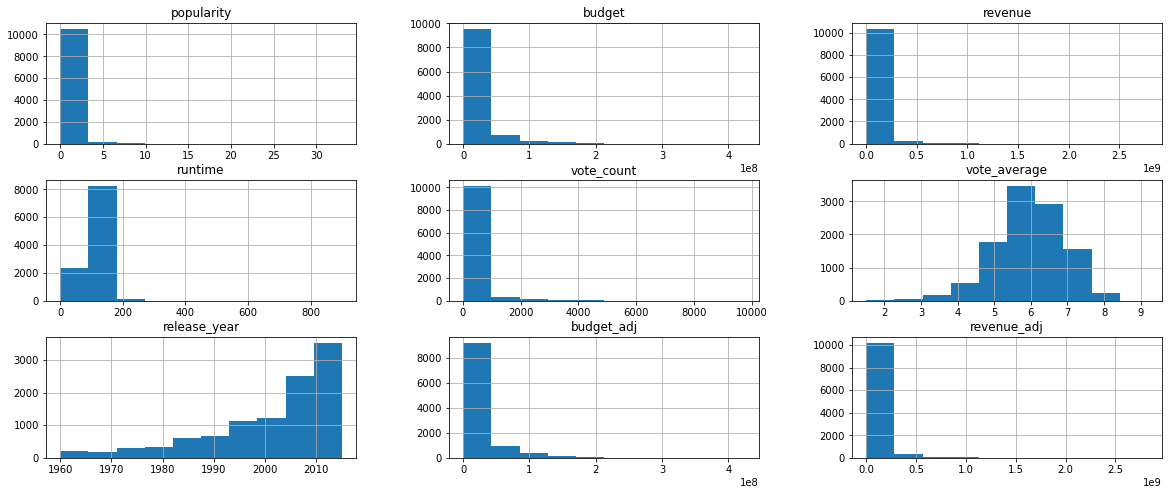

In [37]:
mov_df.hist(figsize= (20,8))

The above charts shows a correlation between each of the columns and the value count of each of the column in the dataset. The first three charts show a chart that is skewed to the right while the chart of release year happens to be skewed to the left.

<a id='eda'></a>
## Exploratory Data Analysis

>In this section, we would carry out exploratory analysis to answer some of the questions that have been listed in the Introduction Section. We would see some trends and insights that are all gotten from our dataset.

### What are the top 5 most popular movies released between 1960-2015?

>Since the popularity column is in a descending order, to get the top 5 most popular movies of all time, we simply check the top 5 rows of the dataset to print out the result


In [38]:
# Top 5 popular movies column
popular_five = mov_df.loc[:4]
popular_five

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]",12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",James Wan,137,"[Action, Crime, Thriller]",4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [39]:
# making the original title column the index to the dataset
popular_five.set_index('original_title', inplace = True)

In [40]:
popular_five

,popularity,budget,revenue,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
original_title,,,,,,,,,,,,,
Jurassic World,32.985763,150000000,1513528810,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
Mad Max: Fury Road,28.419936,150000000,378436354,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
Insurgent,13.112507,110000000,295238201,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
Star Wars: The Force Awakens,11.173104,200000000,2068178225,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]",12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
Furious 7,9.335014,190000000,1506249360,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",James Wan,137,"[Action, Crime, Thriller]",4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### In the 21st Century, In which year was the most movies released?
> In order to get the number of movies produced in the 21st Century i.e 2000 and above, the following steps are carried out.

In [41]:
# The rows for the movies released in year 2000 and above are filtered out.
mov_21st = mov_df[mov_df.release_year >= 2000]
mov_21st

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]",12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",James Wan,137,"[Action, Crime, Thriller]",4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8883,0.015997,15000000,5217498,The In Crowd,"[Susan Ward, Lori Heuring, Matthew Settle, Nat...",Mary Lambert,105,[Thriller],7/19/00,12,5.2,2000,1.899438e+07,6.606877e+06
8884,0.006865,0,0,Phir Bhi Dil Hai Hindustani,"[Juhi Chawla, Shah Rukh Khan, Johnny Lever, Sh...",Aziz Mirza,168,"[Romance, Comedy, Drama]",1/21/00,12,7.2,2000,0.000000e+00,0.000000e+00
8885,0.005784,0,0,The Tao of Steve,"[Donal Logue, Ayelet Kaznelson, John Hines, Jo...",Jenniphr Goodman,87,"[Comedy, Romance]",8/4/00,13,5.5,2000,0.000000e+00,0.000000e+00
8886,0.080819,0,0,George Washington,"[Candace Evanofski, Donald Holden, Damian Jewa...",David Gordon Green,89,[Drama],10/1/00,14,4.9,2000,0.000000e+00,0.000000e+00


In [42]:
mov_21st.release_year.value_counts()    # Shows a count of the total number of movies released in each year

2014    682
2013    649
2015    617
2012    574
2011    532
2009    525
2008    486
2010    475
2007    432
2006    404
2005    361
2004    307
2003    281
2002    264
2001    241
2000    224
Name: release_year, dtype: int64

In [43]:
def countplot(x):
    plt.figure(figsize= (20, 8))
    sns.countplot(x)

C:\Users\Testys\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of movies released in the 21st century')

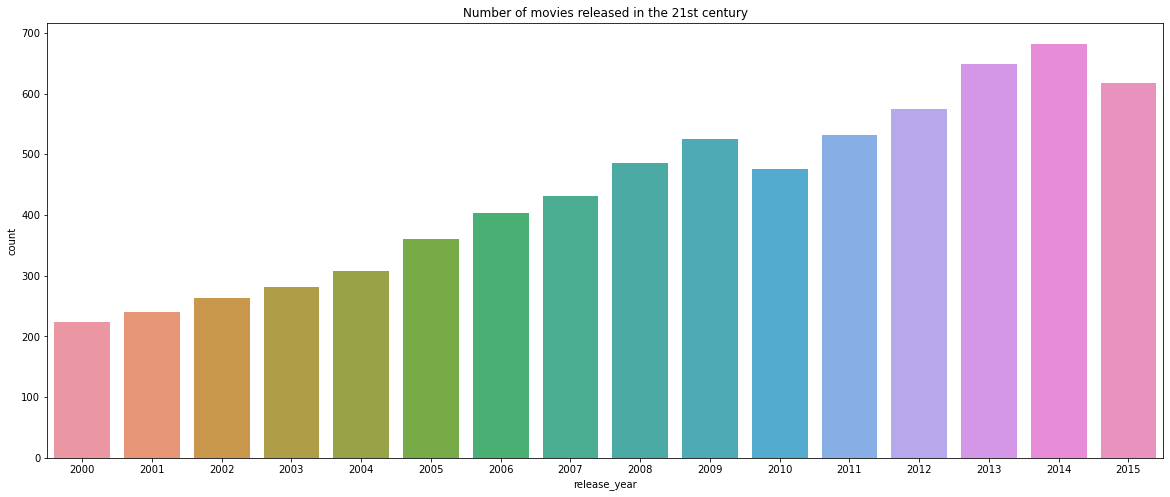

In [50]:
countplot(mov_21st.release_year)
plt.title('Number of movies released in the 21st century')

The Chart is shows the graph of the number of movies released in each year against the year which they where released. The chart happens to be skewed to the left.

### Which directors produced the most movies in the 21st Century?
> Going ahead, we check which directors produced the most movies according to our Data. Then we plot a graph showing the top 5 Director with the most movies

In [51]:
# Gets the number of movies produced by each director
dir_count = mov_21st.director.value_counts()
most_dir = dir_count[dir_count > 11]

In [52]:
dir_count

Steven Soderbergh                  18
Tyler Perry                        17
Woody Allen                        16
Uwe Boll                           16
Ridley Scott                       13
                                   ..
Michael G. Bartlett                 1
Tim Matheson|Reynaldo Rodriguez     1
Brett Pierce|Drew T. Pierce         1
Marc SchÃ¶lermann                   1
Wilson Yip                          1
Name: director, Length: 4054, dtype: int64

In [53]:
most_dir

Steven Soderbergh    18
Tyler Perry          17
Woody Allen          16
Uwe Boll             16
Ridley Scott         13
Clint Eastwood       13
Name: director, dtype: int64

In [54]:
directors = list(most_dir.index)
num_of_movies = [18,17,16,16,13,13]

In [55]:
def bar(x,y):
    plt.figure(figsize= (20,8))
    sns.barplot(x, y )

C:\Users\Testys\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Movies Directed')

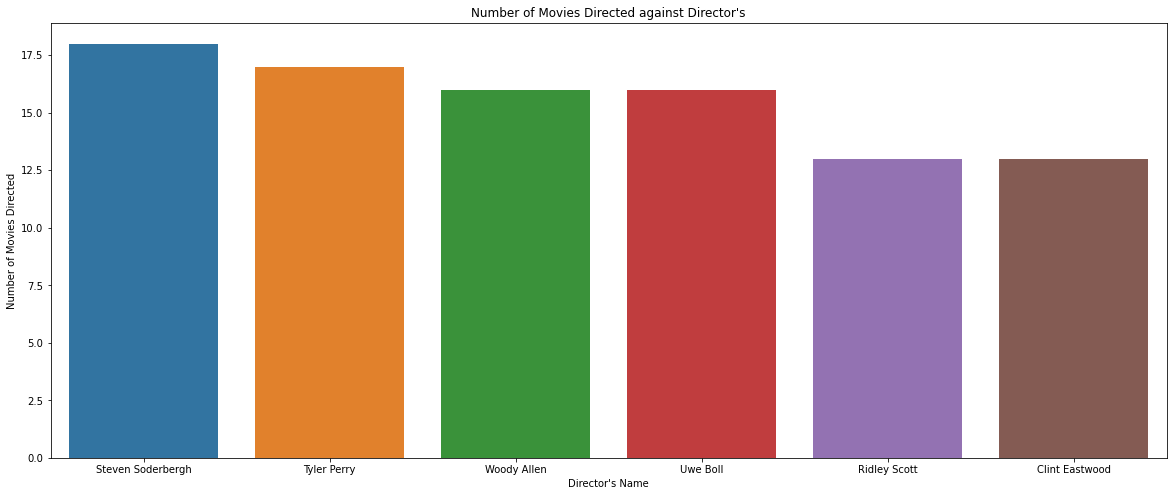

In [56]:
bar(directors, num_of_movies)
plt.title("Number of Movies Directed against Director's")
plt.xlabel("Director's Name")
plt.ylabel('Number of Movies Directed')

The charts shows the top five directors and how many movies they released in the 21st Century.

### In what year was the most profit made?
> First, we start by creating a dataset to hold the sum of all the revenues and budgets in a year, using the budget_adj and revenue_adj column. Then, we get the profit made by subtracting the budget from the revenue made.

In [57]:
profit_data = mov_df.groupby('release_year')['budget_adj', 'revenue_adj'].sum()

<ipython-input-57-1edf898461e6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  profit_data = mov_df.groupby('release_year')['budget_adj', 'revenue_adj'].sum()


In [58]:
profit_data['profit'] =profit_data['revenue_adj'] - profit_data['budget_adj']

In [59]:
profit_21 = profit_data[profit_data.index >= 2000]  # Profit made from 2000 and above.

In [60]:
profit_21

,budget_adj,revenue_adj,profit
release_year,,,
2000,7.284599e+09,1.390224e+10,6.617644e+09
2001,6.947987e+09,1.651436e+10,9.566371e+09
2002,7.142208e+09,1.775188e+10,1.060967e+10
2003,7.396432e+09,1.794416e+10,1.054773e+10
2004,8.277766e+09,1.938755e+10,1.110978e+10
2005,8.199242e+09,1.844209e+10,1.024285e+10
2006,7.900387e+09,1.760497e+10,9.704578e+09
2007,8.022720e+09,2.041464e+10,1.239192e+10
2008,7.876373e+09,1.966902e+10,1.179265e+10


C:\Users\Testys\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Profit made per Year')

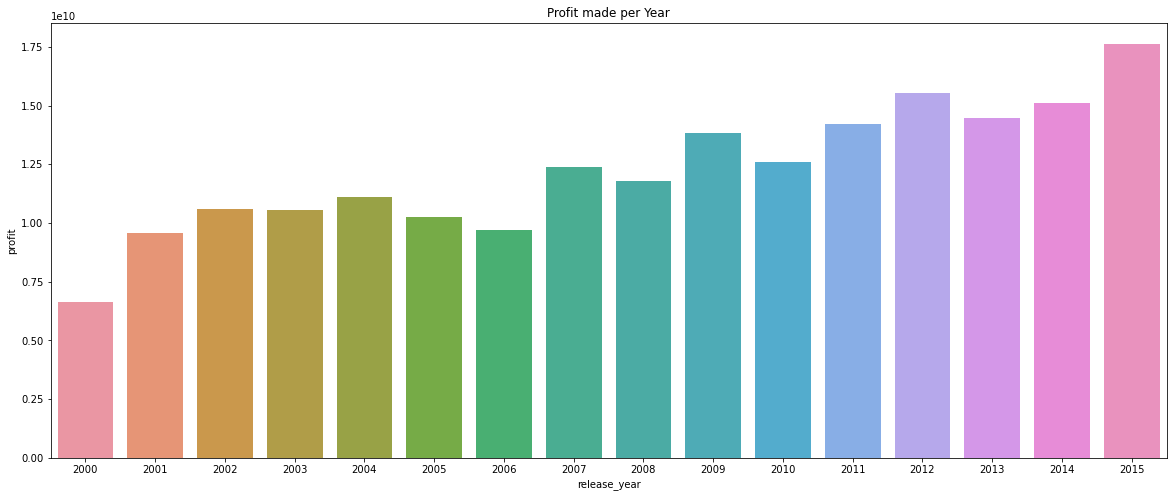

In [61]:
bar(profit_21.index, profit_21.profit)
plt.title('Profit made per Year')

The above Chart shows the profit made over the years in the 21st Century from 2000 - 2015. The Chart is skewed to the left.

Text(0.5, 1.0, 'Scatterplot showing a correlation of the Release year and Profit made over the year')

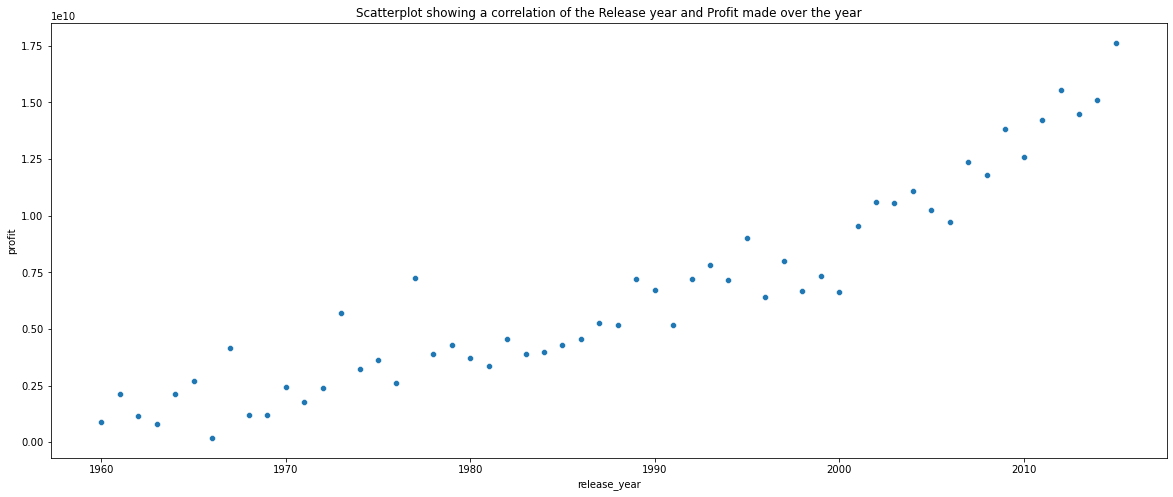

In [62]:
plt.figure(figsize=(20,8))
sns.scatterplot(x= profit_data.index, y= profit_data.profit)
plt.title('Scatterplot showing a correlation of the Release year and Profit made over the year')

The above is a scatterplot that shows the correlation between profit made with the year they were released.

<a id='conclusions'></a>
## Conclusions
> In the first question for analysis, Since the popularity column in the movie dataset happens to be sorted in descending order, we found out that the top 5 most popular movies from 1960 - 2015 according to their popularity rate where the first 5 columns of or dataset. This was then extracted and assigned to the popular_five dataframe. According to analysis done on this dataframe, Jurassic Park, which was released in 2015 topped the table with above 32.5 popularity rate, followed by Mad Max: Fury also released in 2015 with a popularity rate of 28.42. Other movies which appeared in the top 5 are Insurgent (2015), Star Wars: The Force Awakens (2015) and Furious 7(2015). This movies had big superstars actors playing in them like, Vin Diesel, Harrison Ford, Chris Pratt, Tom Hardy amongst other names.
>
> Next, we found out which year in the 21st Century had the most movies. In doing this, we created a new dataframe that selected movies with their release years above 1999. From this dataframe, we were able to extract the value counts of each years in the dataframe. With 2014 having the most movies released in the 21st century with about 682 movies released in that year, 2015 came next with 642 movies released. We went ahead to draw a bar chart showing the Number of Movies released against the year they where released.
>
> We then moved on to get the top directors with the most movies directed in the 21st Century. This lead us to get the value count of each directors present in our dataset. Steven Soderbough and Tyler Perry directed the most movies with 2000-2015, with a total of 18 and 17 movies directed respectively. A few other directors also directed a number of movies, we have a chart showing the number of movies they directed and each directors.
>
> Profit made every year where gotten by creating a new dataframe that showed the total amount made over each years and the budget put into making movies over the year. We were able to get the profit by creating a new column in the dataframe, which contain the profit made. It was calculated by subtracting the budget put into the production of movies from the total revenue made in each year. The budget_adj and the revenue_adj columns where used. A chart showing the profit made against the year it was made was plotted. This showed that the highest profit was made in 2015 with about 17.6 trillion dollars made.
>
> The Movie Database showed great insights on each columns in it. With further analysis, more details can be gotten from the data given.

## Limitations
> The major limitation of this data is that the correlation between the columns were very minor. Also, the poplarity column does not have a correlation with any of the columns present in the data.

In [63]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1